 # Predicting heart disease using machine learning
 
 This jupyter notebook uses python machine learning and data science libraries in order to build a machine learning model that can predict if someone has a heart disease or not based on medical attributes
 
 Approach: 
 1. Problem definition
 2. Data
 3. Evaluation
 4. Features
 5. Modelling 
 6. Experimentation

## 1. Problem definition

We are doing binary classification, that means we are prediction whether or not someone has a heart disease. Can it be made using a classification machine learning model?

## 2. Data

Data comes from Kaggle, it is a version of the Cleaveland UCI Machine Learning Repository. 
https://www.kaggle.com/rotnif/heart-disease-uci

## 3. Evaluation
> We are interested in building a high accuracy project given the problem in which
95% or more accuracy will be the target.

## 4. Features

***Data dictionary***
* age in years
* sex ( 1 = male; 0 = female)
* cp chest pain type
* trestbpsrtesting blood pressure (in mmHg on admission to the hospital)
* cholserum cholestoral in mg/dl
* fbs ( fasting blood sugar > 120 mg/dl) ( 1 = true, 0 = false)
* restecgresting electrocardiographic results
* thalachmaximum heart rate achieved
* exangexercise induced angina (1 = yes, 0 = no)
* oldpeakST deppresion induced by excercise relative to rest
* slopethe slope of the peak excercise ST segment
* canumber of major vessels (0-3) colored by flouroscopy
* thal3 = normal; 6 = fixed defect; 7 = reversable defect
* target 1 or 0

We are going to use pandas, matplotlib and Numpy for data analysis and manipulation

In [1]:
#Hide all warnings to later GitHub good looking code
import warnings
warnings.filterwarnings('ignore')

#Import all libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# we will paint our plots inside the notebook
%matplotlib inline

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve

In [2]:
##Load data
df = pd.read_csv("heart-disease.csv")
df.shape #(rows, columns)

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# 0 = no heart disease and 1 = heart disease
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

(array([0, 1]), [Text(0, 0, 'heart disease'), Text(1, 0, 'no heart disease')])

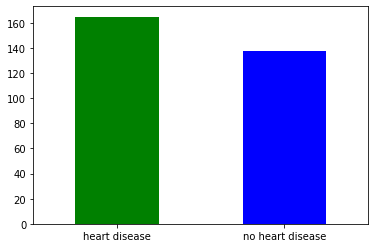

In [5]:
#We have relatively the same amout of values for each type - balanced classification model
ax = df["target"].value_counts().plot(kind = "bar", color = ["green", "blue"])
ax.set_xticklabels(["heart disease", "no heart disease"])
plt.xticks(rotation= 0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum() #Are there any missing values?

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


We need to get an intuition of how the different parameters affect on the target

## Sex - Target

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
#There are much more man than women in the data
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


We might think women are more probable to get a heart disease than men.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

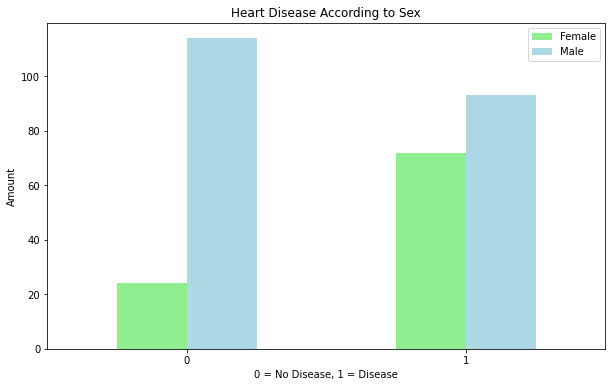

In [11]:
#Plot of the upper crosstab
pd.crosstab(df.target, df.sex).plot(kind = "bar", 
                                   figsize = (10,6),
                                   color = ["lightgreen", "lightblue"] )
plt.title("Heart Disease According to Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0)

## Heart Rate and Age vs Target

***Comparing a couple of independent values.***

***Max heart rate achieved and Age vs Heart Disease***

Text(0, 0.5, 'Heart Rate')

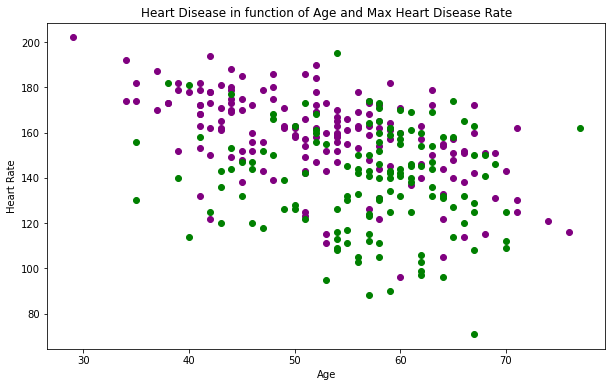

In [12]:
plt.figure(figsize = (10,6))

#Scatter with positive example
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c = "purple") #Heart Disease
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c = "green") #No Heart Disease

plt.title("Heart Disease in function of Age and Max Heart Disease Rate")
plt.xlabel("Age")
plt.ylabel("Heart Rate")

The younger someone is the higher the heart rate, seems to be ordered that way but it is difficult to extract any valuable information from just seeing the scatter plot.

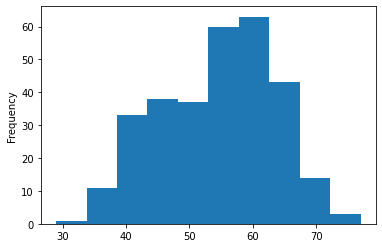

In [13]:
#Check the age distribution 
df.age.plot.hist(); #It seems to be a Normal distribution with mean around 57
#No outliers at this point

## Chest Pain vs Target

In [14]:
pd.crosstab(df.cp, df.target) #Cp is chest pain type.

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


'\n0: Typical angina -> Related decrease blood supply to the heart\n1: Atypical angina -> not related to heart\n2: Non-anginal pain -> esophageal spasms \n3: Asymptomatic -> not showing signs of disease\n'

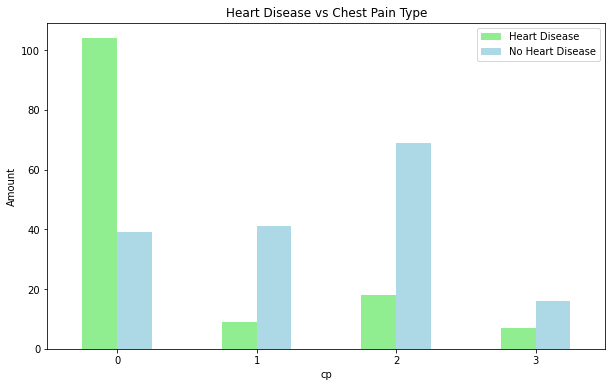

In [15]:
pd.crosstab(df.cp,df.target).plot(kind = "bar",
                                 figsize= (10, 6),
                                 color = ["lightgreen", "lightblue"])
plt.title("Heart Disease vs Chest Pain Type")
plt.ylabel("Amount")
plt.xticks(rotation = 0)
plt.legend(["Heart Disease", "No Heart Disease"])
'''
0: Typical angina -> Related decrease blood supply to the heart
1: Atypical angina -> not related to heart
2: Non-anginal pain -> esophageal spasms 
3: Asymptomatic -> not showing signs of disease
'''

## We will use correlation metrics to learn a little bit more about the data


In [16]:
#Correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


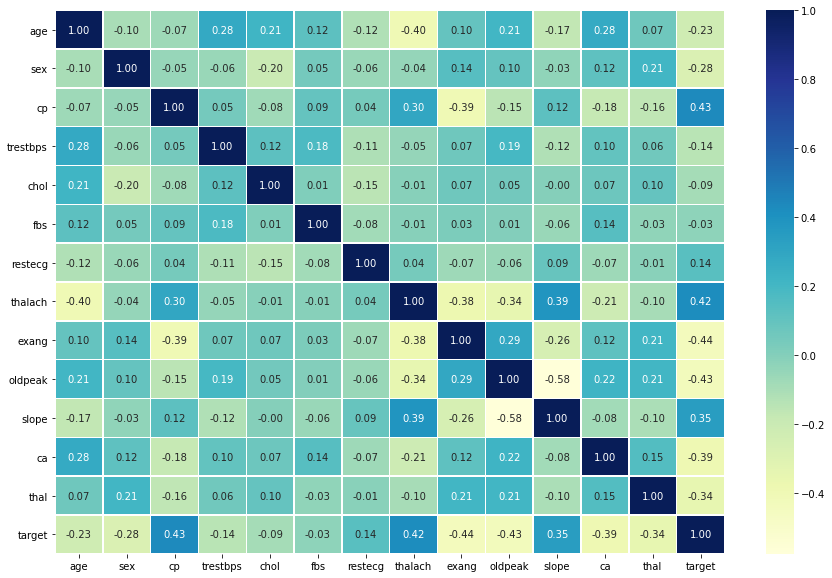

In [17]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix, 
                annot = True,
                linewidth = 0.5,
                fmt = ".2f",
                cmap= "YlGnBu") 

Higher positive value is a higer potential correlation and a higher negative value represents a decrease in correlation - As the correlation goes up the target value increases for postive correlation and decreases for negative correlation!!!

## 5. Modelling

In [18]:
#Split data
X = df.drop("target", axis = 1)
y = df["target"]

In [19]:
#Train and test set
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)

In [20]:
X_train 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [21]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

What machine learning model should we use? A classification model seems to be suitable for this task so we will try on different algorithms: 

    1. RandomForestClassifier
    2. KNearestNeighbors
    3. Logistic Regression
    

In [22]:
# Put models in a dictionary
models = {"LogisticRegression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}
#Function to fit and test models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    #Random seed within the function just to make results reproductible
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [23]:
model_scores = fit_and_score( models, X_train, X_test, y_train, y_test)
model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

(array([0]), [Text(0, 0, 'accuracy')])

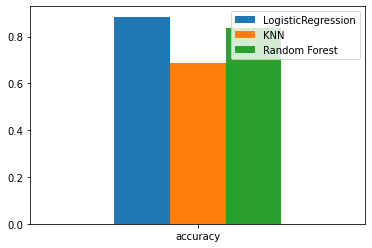

In [24]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
ax = model_compare.plot.bar()
plt.xticks(rotation = 0)

KNN is the worst of all so we might just discard using KNearestNeighbors

### Experimenting with our models 
* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall 
* F1 score
* Classification report
* ROC Curve
* Area under de curve (AUC)

In [25]:
# KNN Experimentation

train_scores = []
test_scores = []

n_neighbors = range(1,21) #different values of n_neighbors used as a hyper-parameter
knn = KNeighborsClassifier()

for i in n_neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data is 0.7540983606557377


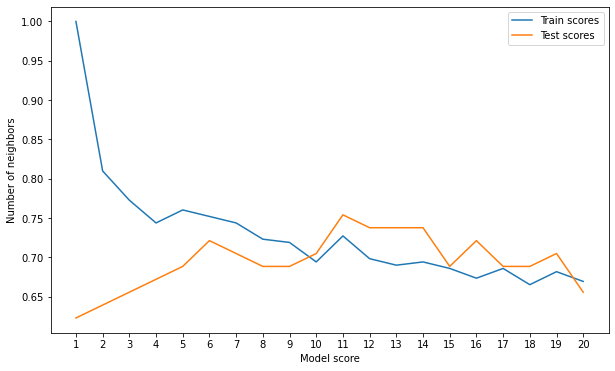

In [26]:
plt.figure(figsize = (10,6))
plt.plot(n_neighbors, train_scores, label = "Train scores")
plt.plot(n_neighbors, test_scores, label = "Test scores")
plt.xticks(np.arange(1,21,1))
plt.ylabel("Number of neighbors")
plt.xlabel("Model score")
plt.legend()
print("Maximum KNN score on the test data is "+ str(max(test_scores)))

**As KNN tuning does not seem to get much better we will finally discard the use of it**

### Using RandomizedSearchCV 
    for Logistic Regression and Random Forest Classifier

In [27]:
#Logistic Regressor - hyperparameters c and solver
log_reg_grid = {"C": np.logspace(-5, 5, 40),
                "penalty" : ['l1', 'l2'],
               "solver": ["liblinear"]}

#RandomForest Classifier  - hyperparameters are n_estimators, max_depth, min_samples_split and min_samples_lead
rf_grid = {"n_estimators": np.arange(10, 100, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [28]:
#Tune Logistic Regression - best performance with default settings
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid,
                               cv = 5, n_iter = 20, verbose = True)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-05, 1.80472177e-05, 3.25702066e-05, 5.87801607e-05,
       1.06081836e-04, 1.91448198e-04, 3.45510729e-04, 6.23550734e-04,
       1.12533558e-03, 2.03091762e-03, 3.66524124e-03, 6.61474064e-03,
       1.19377664e-02, 2.15443469e-02, 3.88815518e-02, 7.01703829e-02,
       1.26638017e-0...
       1.34339933e+00, 2.42446202e+00, 4.37547938e+00, 7.89652287e+00,
       1.42510267e+01, 2.57191381e+01, 4.64158883e+01, 8.37677640e+01,
       1.51177507e+02, 2.72833338e+02, 4.92388263e+02, 8.88623816e+02,
       1.60371874e+03, 2.89426612e+03, 5.22334507e+03, 9.42668455e+03,
       1.70125428e+04, 3.07029063e+04, 5.54102033e+04, 1.00000000e+05]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   verbose=True)

In [29]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.22854638641349884}

In [30]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

It does not seem to go up by tuning hyperparameters

In [31]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid,
                               cv = 5, n_iter = 20, verbose = True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [32]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 18,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [33]:
rs_rf.score(X_test, y_test)

0.819672131147541

Still worse than LogisticRegression, we will focus on the best one and try to improve it so it reaches the target accuracy. How can we make LogisticRegression to perform better?

### Using GridSearchCV on LogisticRegression()

In [34]:
log_reg_grid = {"C": np.logspace(-5, 5, 50),
               "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=6,
                         verbose = True)
gs_log_reg.fit(X_train, y_train)

Fitting 6 folds for each of 50 candidates, totalling 300 fits


GridSearchCV(cv=6, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e-02, 4.714866...
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05]),
                         'solver': ['liblinear']},
             verbose=True)

In [35]:
gs_log_reg.best_params_

{'C': 0.19306977288832497, 'solver': 'liblinear'}

In [36]:
gs_log_reg.score(X_test, y_test) 

0.8852459016393442

In [37]:
model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

Still the same accuracy percentage!

### Evaluation of the algorithm beyond accuracy.

**ROC curve and AUC score**

In [38]:
y_preds = gs_log_reg.predict(X_test)

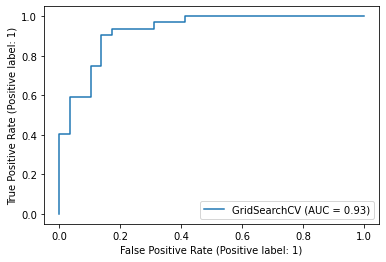

In [39]:
fig = plot_roc_curve(gs_log_reg, X_test, y_test)

**Confusion Matrix**

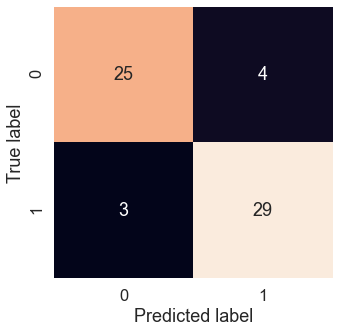

In [40]:
sns.set(font_scale = 1.5)
def plot_conf_matrix(y_test, y_preds):
    fig, ax = plt.subplots(figsize= (5,5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_conf_matrix(y_test, y_preds) 

Model is quite symmetric regarding false positives and false negatives.

## Classification report, cross_validated precision, recall and f1_score 

In [41]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [42]:
#Calculate evaluation metrics using cross-validation.
gs_log_reg.best_params_

{'C': 0.19306977288832497, 'solver': 'liblinear'}

In [43]:
clf = LogisticRegression(C = 0.20433597178569418, solver = "liblinear")

In [44]:
#Accuracy 
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring="accuracy")
cv_acc = np.mean(cv_acc)
"Accuracy is " + str(cv_acc)

'Accuracy is 0.8446994535519124'

In [45]:
#Precision
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
"Precision is " + str(cv_precision)

'Precision is 0.8207936507936507'

In [46]:
#Recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring="recall")
cv_recall = np.mean(cv_recall)
"Recall is " + str(cv_recall)

'Recall is 0.9212121212121213'

In [47]:
#F1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
"F1 is " + str(cv_f1)

'F1 is 0.8673007976269721'

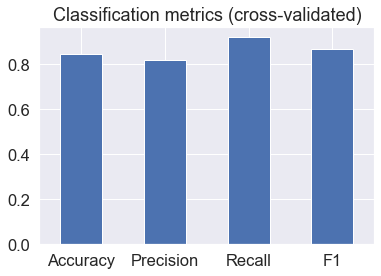

In [48]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index = [0])

ax = cv_metrics.T.plot.bar(title = "Classification metrics (cross-validated)",
                     legend = False)
plt.xticks(rotation= 0);

## How would we know the feature importance?
Which feature contributed most to the outcomes of the model and how did they contribute? 

In [49]:
clf = LogisticRegression(C= 0.20433597178569418, solver = "liblinear")
clf.fit(X_train, y_train);

In [50]:
clf.coef_ #Value on how each parameter contributes to our target labels.

array([[ 0.00316728, -0.86044674,  0.66067031, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.56862789,
         0.45051632, -0.63609908, -0.67663375]])

In [51]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672830780218957,
 'sex': -0.8604467440762573,
 'cp': 0.6606703120090932,
 'trestbps': -0.011569932037408597,
 'chol': -0.00166374523064295,
 'fbs': 0.043861009724542044,
 'restecg': 0.3127586507840532,
 'thalach': 0.024593615555173243,
 'exang': -0.6041309439103262,
 'oldpeak': -0.5686278914396258,
 'slope': 0.4505163222528207,
 'ca': -0.6360990763634887,
 'thal': -0.6766337475895309}

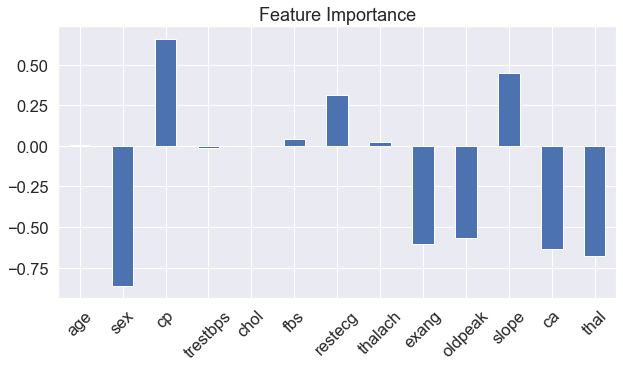

In [52]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title = "Feature Importance", legend = False, figsize = (10,5))
plt.xticks(rotation = 45);

This gives us kind of the same information as this feature importance bar graph

**We havent reached our evaluation still - Why not trying on some other models?**

## Trying AdaBoost 

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
np.random.seed(42)
adaboostgrid = {"n_estimators": np.arange(30,70,5),
               "learning_rate": np.arange(0.6, 1.5, 0.1)}
adaboost = RandomizedSearchCV(AdaBoostClassifier(),
                             cv=5,
                             param_distributions= adaboostgrid,
                             n_iter = 20,
                             verbose = True)
adaboost.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [54]:
adaboost.score(X_test,y_test)

0.8032786885245902

In [55]:
adaboost.best_params_

{'n_estimators': 30, 'learning_rate': 1.2999999999999998}

Score with adaboost is approx. 80%, why dont we try with a Voting algorithm between:
    **AdaBoostClassifier()**
    **LogisticRegression()**
    **RandomForestClassifier()**

In [56]:
from sklearn.ensemble import VotingClassifier
np.random.seed(42)
clf1 = LogisticRegression(C=  0.20433597178569418, solver = "liblinear")
clf2 = AdaBoostClassifier(n_estimators = 30, learning_rate = 1.299999999999999)
clf3 = RandomForestClassifier(n_estimators= 10, min_samples_split = 18, min_samples_leaf = 17, 
                             max_depth = 3)
vclf = VotingClassifier(
       estimators = [('lr', clf1), ('ab', clf2), ('rfc', clf3)],
       voting = 'hard')
for clf, label in zip([clf1, clf2, clf3, vclf], ['Logistic Regression', 'AdaBoost', 'RandomForest', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.84 (+/- 0.05) [Logistic Regression]
Accuracy: 0.82 (+/- 0.04) [AdaBoost]
Accuracy: 0.83 (+/- 0.03) [RandomForest]
Accuracy: 0.86 (+/- 0.04) [Ensemble]


Voting is lifting up our accuracy but again, it does not match the requirements for this problem. Would using a SVC model help in this? If so, could we improve the results by Voting?

In [57]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=0, tol=1e-5))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [58]:
clf.score(X_test, y_test)

0.8688524590163934

Since SVC is getting (without tuning) the highest scores we suggest doing some hyperparameter tuning. 

In [59]:
from scipy.stats import reciprocal, uniform
np.random.seed(42)
param_distributions = {"C": uniform(0.01, 10),"tol": np.arange(1e-4, 2e-4, 0.5e-5)}
svc_clf = RandomizedSearchCV(LinearSVC(penalty = 'l1', dual = False),
                             cv=5,
                             param_distributions= param_distributions,
                             n_iter = 100,
                             verbose = True)
svc_clf.fit(X_train,y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [60]:
svc_clf.score(X_test, y_test), svc_clf.best_params_

(0.8852459016393442, {'C': 0.1426496115986653, 'tol': 0.000165})

In [61]:
LinearSVC().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose'])

We have finally ended up with a 88% accuracy rate, lets add LinearSVC to the Voting!

In [62]:
from sklearn.ensemble import VotingClassifier
np.random.seed(32)
clf1 = LogisticRegression(C= 0.19306977288832497, solver = "liblinear",penalty = 'l1')
clf2 = AdaBoostClassifier(n_estimators = 30, learning_rate = 1.3)
clf3 = RandomForestClassifier(n_estimators= 120, min_samples_split = 18, min_samples_leaf = 17, 
                           max_depth = 3)
clf4  = svc_clf
clf3.fit(X_train,y_train)
vclf = VotingClassifier(
       estimators = [('lr', clf1),('adab',clf2), ('rf', clf3),('svc', clf4)],
       voting = 'hard')
vclf.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.19306977288832497,
                                                 penalty='l1',
                                                 solver='liblinear')),
                             ('adab',
                              AdaBoostClassifier(learning_rate=1.3,
                                                 n_estimators=30)),
                             ('rf',
                              RandomForestClassifier(max_depth=3,
                                                     min_samples_leaf=17,
                                                     min_samples_split=18,
                                                     n_estimators=120)),
                             ('svc',
                              RandomizedSearchCV(cv=5,
                                                 estimator=LinearSVC(dual=False,
                                                                     penalty='l1'),
   

In [63]:
clf3.score(X_test, y_test), vclf.score(X_test, y_test)

(0.8688524590163934, 0.8852459016393442)

**Target is not achieved, some more research is needed. We ended up with a 88% overall accuracy with the use of Voting**

More data is thought to be needed to get better results since the database is not long enough to jump into many conclusions for the model to reach a certain accuracy value. Next we will do a result analysis and focus on getting more data.